### Image Data Augmentation
# **Basic Image Manipulations**


In [1]:
import os
import cv2
import csv
import glob
import time
import random
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from geometric_transformations import *

In [30]:
# https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

# |    name    |  id  |
# _____________________
# |  'ground'  |  6   |
# |   'road'   |  7   |
# | 'sidewalk' |  8   |
# |  'person'  | 24   |

# Background
road_value = 7
ground_value = 6
sidewalk_value = 8

# Foreground
person_value = 24


dataset_size = 9

### **Data path list creating**
#### Paths in csv. file reading

In [31]:
fgPaths = '/home/admin1/Programming/HIWI_MRT/image_data_augmentation/basic_approaches/citysc_fgPaths.csv'
bgPaths = '/home/admin1/Programming/HIWI_MRT/image_data_augmentation/basic_approaches/citysc_bgPaths.csv'

save_directory = '/home/admin1/Programming/HIWI_MRT/cityscapes_data/created_dataset/'

In [32]:
def pathReader(path):
    # Read paths of a CSV file
    with open(path, newline='') as fg_bg_data:
        reader = csv.reader(fg_bg_data)
        data = list(reader)
    return data

In [33]:
fg_path_list = pathReader(fgPaths)
bg_path_list = pathReader(bgPaths)

### Program testing
#### ! Second variante !

In [ ]:
# Activate for the testing of the particular images, masks
""" 
fg_dir = '/home/admin1/Programming/HIWI_MRT/cityscapes_data/foreground/'
bg_dir = '/home/admin1/Programming/HIWI_MRT/cityscapes_data/background/'

save_directory = '/home/admin1/Programming/HIWI_MRT/cityscapes_data/created_dataset/'


fg_path_list = [[fg_dir+'img'+'/aachen_000020_000019_leftImg8bit.png', fg_dir+'mask'+'/aachen_000020_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/aachen_000031_000019_leftImg8bit.png', fg_dir+'mask'+'/aachen_000031_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/aachen_000114_000019_leftImg8bit.png', fg_dir+'mask'+'/aachen_000114_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/cologne_000056_000019_leftImg8bit.png', fg_dir+'mask'+'/cologne_000056_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/cologne_000100_000019_leftImg8bit.png', fg_dir+'mask'+'/cologne_000100_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/cologne_000108_000019_leftImg8bit.png', fg_dir+'mask'+'/cologne_000108_000019_gtFine_labelIds.png'],
               [fg_dir+'img'+'/cologne_000121_000019_leftImg8bit.png', fg_dir+'mask'+'/cologne_000121_000019_gtFine_labelIds.png']]


bg_path_list = [[bg_dir+'img'+'/bremen_000000_000019_leftImg8bit.png', bg_dir+'mask'+'/bremen_000000_000019_gtFine_labelIds.png'],
               [bg_dir+'img'+'/bremen_000001_000019_leftImg8bit.png', bg_dir+'mask'+'/bremen_000001_000019_gtFine_labelIds.png'],
               [bg_dir+'img'+'/bremen_000009_000019_leftImg8bit.png', bg_dir+'mask'+'/bremen_000009_000019_gtFine_labelIds.png']]
"""

### **Basic image edit functions**

In [34]:
def data_name(fg_path,bg_path): 
    FGname = '_'.join(fg_path[1].split('/')[-1].split('_')[:-2])
    BGname = '_'.join(bg_path[1].split('/')[-1].split('_')[:-2])
    
    return FGname, BGname

In [35]:
def data_loader(fg_path,bg_path):    
    # Foreground paths
    imgFG_path = fg_path[0]; maskFG_path = fg_path[1]
    
    # Background paths
    imgBG_path = bg_path[0]; maskBG_path = bg_path[1]
    
    
    FGimg = cv2.imread(imgFG_path); FGimg = cv2.cvtColor(FGimg, cv2.COLOR_BGR2RGB)
    FGmask = cv2.imread(maskFG_path); FGmask = cv2.cvtColor(FGmask, cv2.COLOR_BGR2RGB)
    
    BGimg = cv2.imread(imgBG_path); BGimg = cv2.cvtColor(BGimg, cv2.COLOR_BGR2RGB)
    BGmask = cv2.imread(maskBG_path); BGmask = cv2.cvtColor(BGmask, cv2.COLOR_BGR2RGB)
    
    return FGimg, FGmask, BGimg, BGmask     

In [36]:
def data_saver(data_name, img, mask, id_data):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
    
    img_path = os.path.join(save_directory, 'img', data_name + '_' + str(id_data) + '.jpg')
    mask_path = os.path.join(save_directory, 'mask', data_name + '_' + str(id_data) +'.png')
    
    cv2.imwrite(img_path, img)
    cv2.imwrite(mask_path, mask)

In [37]:
def current_id():
    path_list = glob.glob(os.path.join(save_directory, 'mask','*'))
    
    if not path_list:
        current_id = 1
    else:
        current_id = int(len(path_list)+1)
    return current_id

## **Main function**

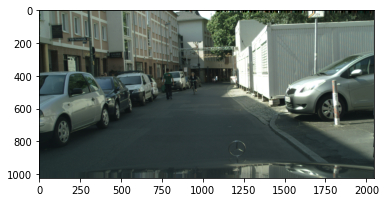

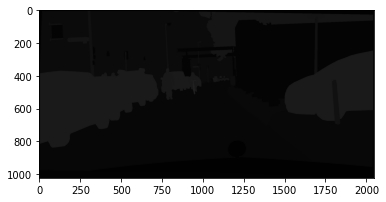

------------------- 6 done --------------------
------------------- 3 rest --------------------


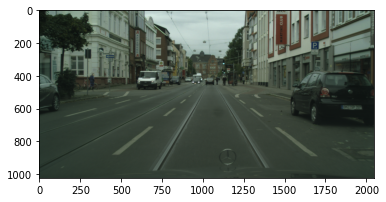

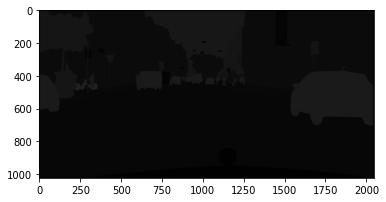

------------------- 7 done --------------------
------------------- 2 rest --------------------


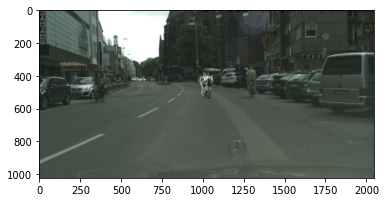

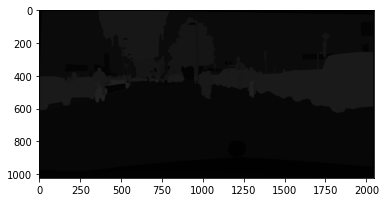

------------------- 8 done --------------------
------------------- 1 rest --------------------


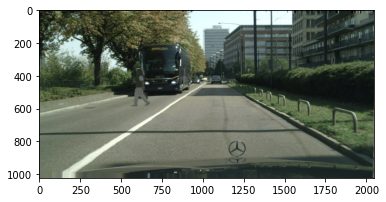

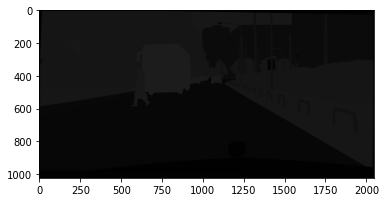

------------------- 9 done --------------------
------------------- 0 rest --------------------
----------------- 27.13 seconds ----------------


In [38]:
if __name__ == '__main__':
    start_time = time.time()

    id_data = current_id()
    #id_data = 1
    
    while  (id_data <= dataset_size):
        
        fg_path = random.choice(fg_path_list);  
        bg_path = random.choice(bg_path_list);

        # Data name chosing
        FGname, BGname = data_name(fg_path, bg_path)

        # Data loading
        FGimg, FGmask, BGimg, BGmask = data_loader(fg_path, bg_path)
        FGheight = FGmask.shape[0]; FGwidth = FGmask.shape[1]
        BGheight = BGmask.shape[0]; BGwidth = BGmask.shape[1]

        
        # -------- Transformation/ Translation -------- #
        # Foreground fliping
        flip_FGimg, flip_FGmask = data_fliper(FGimg, FGmask)
        
        # Background fliping
        flip_BGimg, flip_BGmask = data_fliper(BGimg, BGmask)

        # Object preprocessing 
        if obj_preprocesser(flip_FGimg, flip_FGmask, BGheight, BGwidth, person_value, FGheight, FGwidth):
            obj_img, obj_mask, x,y,w,h = obj_preprocesser(flip_FGimg, 
                                                          flip_FGmask, 
                                                          BGheight, 
                                                          BGwidth, 
                                                          person_value, 
                                                          FGheight, 
                                                          FGwidth)
        else:
            continue
            
        # Random place finding
        stand_y, stand_x = random_place_finder(flip_BGmask,
                                               ground_value, 
                                               sidewalk_value, 
                                               road_value, 
                                               BGheight, 
                                               BGwidth)

        # Size of person finding
        obj_mask_height = obj_mask.shape[0]; obj_mask_width = obj_mask.shape[1]
        if person_size_finder(stand_y, w, h, obj_mask_height, obj_mask_width):
            stand_obj_height, stand_obj_width = person_size_finder(stand_y, 
                                                                   w, 
                                                                   h, 
                                                                   obj_mask_height, 
                                                                   obj_mask_width)
        else:
            continue
            
        # Img and mask of object resizing 
        # Matting function using
        resized_obj_img, resized_obj_mask, alpha, smoother_mask, trimap_mask = obj_resizer(obj_img, 
                                                                              obj_mask, 
                                                                              stand_obj_height, 
                                                                              stand_obj_width, 
                                                                              person_value)

        # Foreground and background preprocessing 
        fg_bg_img, fg_bg_mask = fg_bg_preprocesser(resized_obj_img, 
                                                   smoother_mask, 
                                                   alpha, 
                                                   flip_BGimg, 
                                                   flip_BGmask,
                                                   stand_y, stand_x, 
                                                   stand_obj_height, 
                                                   stand_obj_width, 
                                                   BGheight, 
                                                   BGwidth,
                                                   person_value)
        
        # Data saving 
        data_saver(FGname, fg_bg_img, fg_bg_mask, id_data)
        
        plt.imshow(fg_bg_img)  
        plt.show()
        
        plt.imshow(fg_bg_mask)
        plt.show() 
        
        
        print("------------------- %s done --------------------" % (id_data))
        print("------------------- %s rest --------------------" % (dataset_size - id_data))
        id_data += 1
    print("----------------- %s seconds ----------------" % ( round((time.time() - start_time), 2) ))